## Лабораторная работа №1. Data storytelling.

### Задание.
***
1. Выбрать набор данных (датасет). Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.  
2. Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:  
* История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.  
* На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.  
* Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.  
* Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии [data-to-viz](https://www.data-to-viz.com/). Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.  
* История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.  
3. Сформировать отчет и разместить его в своем репозитории на github.  

## Выполнение
***
В качестве датасета будет использоваться датасет [Students Performance in Exams](https://www.kaggle.com/spscientist/students-performance-in-exams). В датасете представленны оценки студетов по трем экзаменам. А также дополнительная информация - проходили ли студенты подготовку к экзаменам (test preparation course), наличие обеда (lunch), пол студента (gender), национальность (race/ethnicity), уровень образования родителей (parental level of education). Данныей датасет - учебный (данные сгенерированы).  
Анализируя эти данные можно понять, какие факторы оказывают решающее значение на результаты тестов, влияет ли подготовка к экзаменам на их успешность и какие факторы сопуствовали студентам получившим наилучшие и наихудшие оценки на экзамене.  

Подготовка датасета:  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

dataset = pd.read_csv("../data/StudentsPerformance.csv")
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Введем дополнительную колонку для удобства визуализации - среднией балл по 3м экзаменам:

In [109]:
mean_score = np.around(np.mean(dataset[["math score", "reading score", "writing score"]], axis = 1)).astype(int)
dataset["mean score"] = mean_score

#### **Шаг 1. Проверим предположение, что большинство студентов заканчивают курс подготовки к экзаменам**

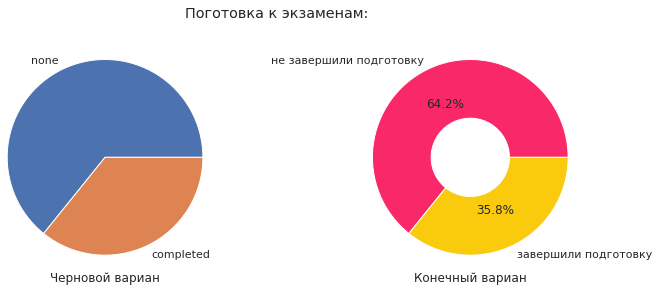

In [110]:
preparation_values_cnt = dataset["test preparation course"].value_counts()
figure, (plot1, plot2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,3))
figure.suptitle("Поготовка к экзаменам:", x = 0.5, y = 1.2)
# Черновой вариант:
plot1.pie(preparation_values_cnt, labels = preparation_values_cnt.index, radius = 1.5)
plot1.set_title("Черновой вариан", y = -0.3)
# Конечный вариант:
colors = ["#F92969","#FACA0C"]
preparation_pie, _, _ = plot2.pie(preparation_values_cnt, radius = 1.5, labels = ["не завершили подготовку", "завершили подготовку"], 
                                colors = colors, autopct="%.1f%%")
plt.setp(preparation_pie, width = 0.9, edgecolor = "white") 
plot2.set_title("Конечный вариан", y = -0.3)
plt.show()

**Вывод:** исходня из диаграммы очевидно, что большинство студентов не завершили подготовку к эказаменам.

#### **Шаг 2. Изучим как распределены оценки студентов с помощью Ridgeline plot**

In [150]:
# Формируем вспомогательный датасет:
exams_score_names = ["math score", "reading score", "writing score", "mean score"]
score_data = pd.DataFrame({"exam":[], "score":[]})
for val in exams_score_names:
    score_data = score_data.append(pd.DataFrame({"exam" : [val] * dataset.shape[0], 
                                                     "score" : dataset[val]}))

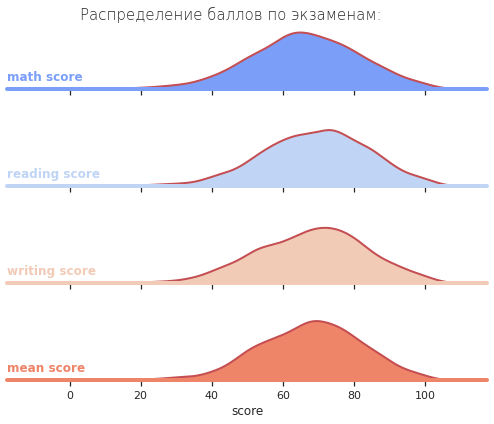

In [151]:
# Примеры: https://seaborn.pydata.org/examples/kde_ridgeplot; https://datavizpyr.com/ridgeline-plot-in-python-with-seaborn/
pal = sns.color_palette(palette= "coolwarm", n_colors = 4)
g = sns.FacetGrid(score_data, row = "exam", hue = "exam", aspect = 5, height = 1.5, palette = pal)
# kdeplots for each exam:
g.map(sns.kdeplot, "score", clip_on = False, fill = True, alpha = 1 , linewidth = 1.5)
# red border:
g.map(sns.kdeplot, "score", clip_on = False, color = "r", lw = 2)
# horizontal line for each plot:
g.map(plt.axhline, y = 0, lw = 4, clip_on = False)
# plot names:    
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "score")
# Remove axes details that don't play well with overlap:
g.set_titles("")
g.set(yticks = [])
g.despine(bottom = True, left = True)

g.fig.suptitle("Распределение баллов по экзаменам:",
               ha='center',
               fontsize=15,
               fontweight=20)
plt.show()

**Вывод:** как видно из графиков плотностей, наиболее сложным эказменом оказался экзамен по математике, вершина распределения на данном графике смещена в лево сильнее чем у остальных экзаменов. А средние результаты по экзаменам находятся в районе 75 баллов. В целом распределение баллов по всем экзаменам имеет похожие формы.

#### **Шаг 3. Проверим предположение, что студенты закончившие подготовку к экзаменам получили высшие баллы:**  
Посчитаем средний балл по всем экзаменам и средний балл по каждому экзамену для студентов прошедших курс подготовки и не сделавших это:

In [169]:
# Сформируем статистику:
not_prepared = dataset[dataset["test preparation course"] == "none"]
prepared = dataset[dataset["test preparation course"] == "completed"]
test_prepare_statistic = {"prepared" : [], "not prepared" : []}
for key in test_prepare_statistic.keys():
        test_prepare_statistic[key] = [(round(prepared[exam].mean()) if key == "prepared" else round(not_prepared[exam].mean())) for exam in exams_score_names]
print(test_prepare_statistic)

{'prepared': [70, 74, 74, 73], 'not prepared': [64, 67, 65, 65]}


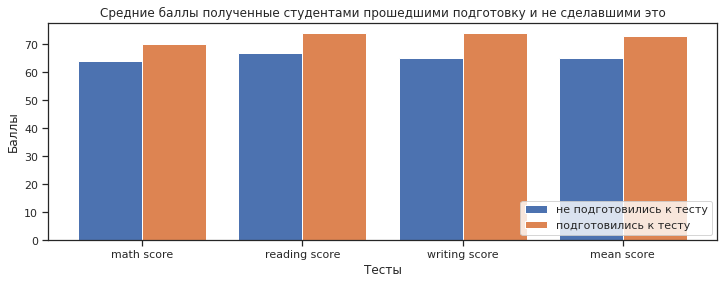

In [173]:
index = np.arange(len(exams_score_names))
bar_width = 0.4
fig, ax = plt.subplots(figsize = (12,4))
summer = ax.bar(index, test_prepare_statistic["not prepared"], bar_width, label="не подготовились к тесту")
winter = ax.bar(index + bar_width, test_prepare_statistic["prepared"], bar_width, label="подготовились к тесту")

ax.set_xlabel('Тесты')
ax.set_ylabel('Баллы')
ax.set_title("Средние баллы полученные студентами прошедшими подготовку и не сделавшими это")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(exams_score_names)
ax.legend(loc = "lower right")

plt.show()

**Вывод:** из диаграммы следуют, что студенты закончившие подготовку к тесту имеют средний балл по всем экзаменам выше чем не подготовившиеся студенты.

#### **Шаг 4. Проверим предположение, что :**  